# Adding income information to a synthetic population of households

In this example, we already have a synthetic population of households on Nantes city. This synthetic population was built using the French national Census of the population. For each household, serveral characteristics have been added:

- Ownership : owner or tenant of its accomodation
- Age : age of reference person
- Size : number of persons
- Family composition : composition (single person, couple with ou without children, etc)

The objectif is to add income information to each household. In order to reach this goal, we use another data source named Filosofi. More precisely, this data source gives information on the income distribution (deciles) for each city, per household characteristics.

Filosofi is an indicator set implemented by INSEE which is the French National Institute of Statistics. See [insee.fr](https://www.insee.fr/fr/metadonnees/source/serie/s1172) for more details.


## Data preparation

Read synthetic population which doesn't contain revenu information.

In [1]:
import pandas as pd

synth_pop = pd.read_csv("../tests/data/synpop_nantes.csv")

synth_pop.head()

age    size ownership           family_comp sex
0  60_74  2_pers     Owner  Couple_without_child   F
1  60_74  2_pers     Owner  Couple_without_child   M
2  60_74  2_pers     Owner  Couple_without_child   M
3   0_29  1_pers    Tenant            Single_wom   F
4  60_74  2_pers     Owner  Couple_without_child   F

Read Filosofi data and format dataframe.

In [2]:
from bhepop2.tools import read_filosofi, filosofi_attributes

filosofi = read_filosofi(
    "../tests/data/FILO_DISP_COM.xls", "15", filosofi_attributes, ["44109"]
)

filosofi.head()

commune_id            D1  ...  attribute  modality
14824      44109  10303.478261  ...        all       all
1974       44109   9794.000000  ...       size    1_pers
2144       44109  12176.000000  ...       size    2_pers
2144       44109  10583.500000  ...       size    3_pers
2144       44109  10740.476190  ...       size    4_pers

[5 rows x 13 columns]

## Run algorithm

In [3]:
from bhepop2.quantitative_enrichment import QuantitativeEnrichment

# Household modalities
MODALITIES = {
    "ownership": ["Owner", "Tenant"],
    "age": ["0_29", "30_39", "40_49", "50_59", "60_74", "75_or_more"],
    "size": ["1_pers", "2_pers", "3_pers", "4_pers", "5_pers_or_more"],
    "family_comp": [
        "Single_man",
        "Single_wom",
        "Couple_without_child",
        "Couple_with_child",
        "Single_parent",
        "complex_hh",
    ],
}

# Algorithm parameters
PARAMETERS = {
    "abs_minimum": 0,
    "relative_maximum": 1.5,
    "delta_min": 1000,
}

# Optimisation preparation
enrich_class = QuantitativeEnrichment(
    synth_pop, filosofi, list(MODALITIES.keys()), parameters=PARAMETERS, seed=42
)

# Run optimisation
enrich_class.optimise()

# Assign data to synthetic population
pop = enrich_class.assign_feature_value_to_pop()

pop.head()

age    size ownership           family_comp sex  feature
0  60_74  2_pers     Owner  Couple_without_child   F    35616
1  60_74  2_pers     Owner  Couple_without_child   M    25144
2  60_74  2_pers     Owner  Couple_without_child   M    38942
3   0_29  1_pers    Tenant            Single_wom   F    27188
4  60_74  2_pers     Owner  Couple_without_child   F    28476

## Results analysis

### Data preparation

In [4]:
from bhepop2.analysis import QuantitativeAnalysis

populations = {
    "enriched_population": pop
}

analysis = QuantitativeAnalysis(populations, MODALITIES, "feature", filosofi)

### Some plots

In [5]:
from IPython.display import Image

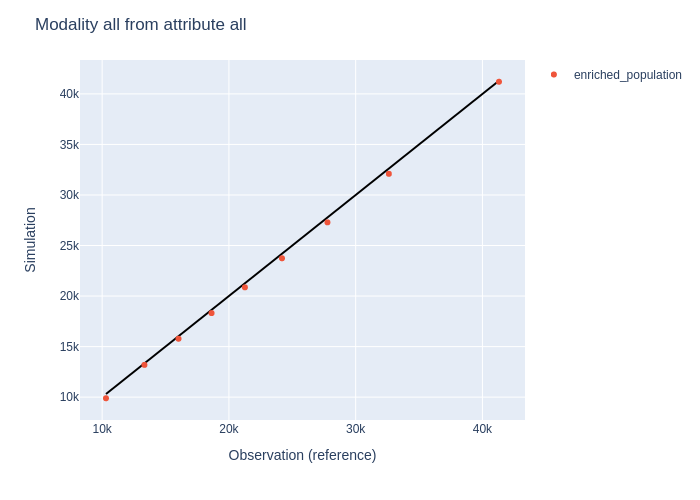

In [6]:
Image(analysis.plot_analysis_compare("all", "all").to_image())

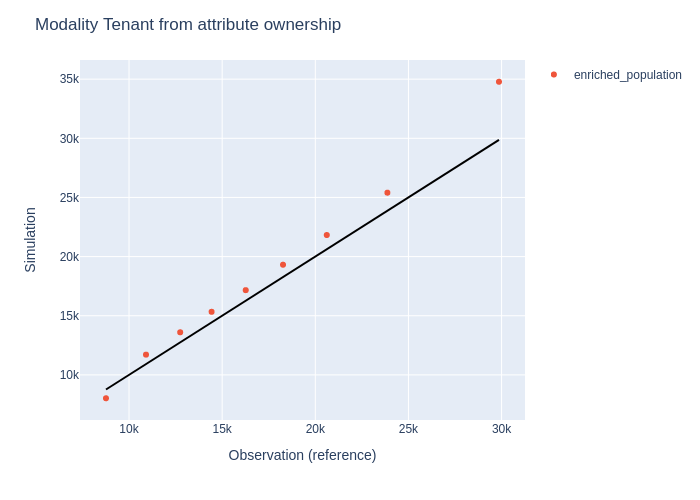

In [7]:
Image(analysis.plot_analysis_compare("ownership", "Tenant").to_image())


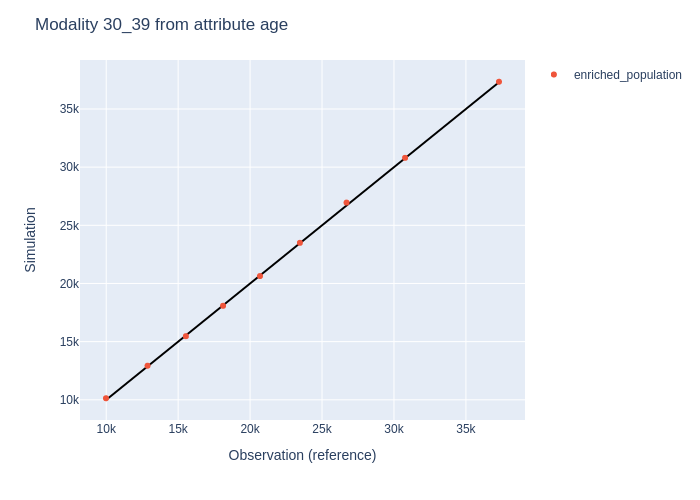

In [8]:
Image(analysis.plot_analysis_compare("age", "30_39").to_image())

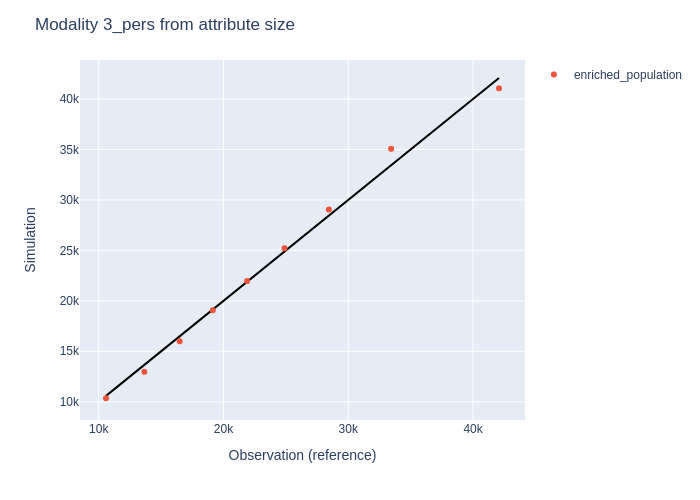

In [9]:
Image(analysis.plot_analysis_compare("size", "3_pers").to_image())

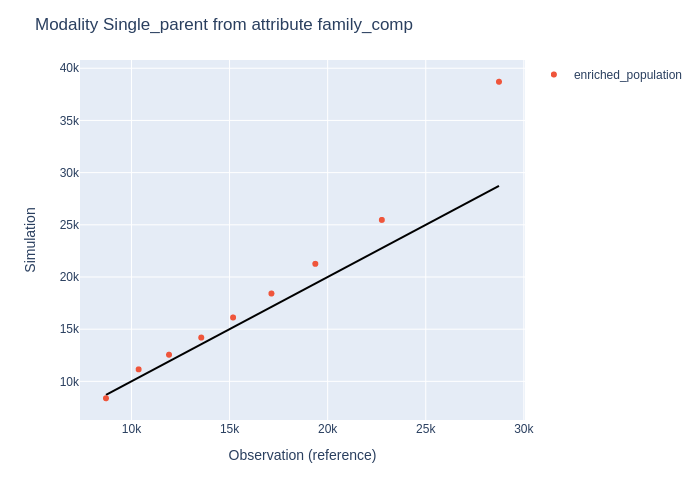

In [10]:
Image(analysis.plot_analysis_compare("family_comp", "Single_parent").to_image())